# Part II - (Data Explanatory Analysis on Airline Data)
## by (Oriji Sandra Onyinyechi)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> The overall goal of my presentation to to explore that data, derive insight from the data and present it. I will also have to answer the following question:
* From the Top 10 flight starting from Origin and destination, How much time (mins) on the average does it take for the flight to drive from the point of origin to it's destination?
* From the Top 10 flight UniqueCarrier, how many of the flight was cancelled?
* Are there certain destination or arrival cities that are home to more delays or cancellations?
* What are the preferred times for flights to occur? Are there any changes over multiple years?


## Dataset Overview

> I am using Airline data, it consist of flight arrival and departure details for all commercial flights within the USA in the year 2008. It is the same data cleaned data i used in my data explanatory analysis. It has 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', 100)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flight = pd.read_csv('flight_2008.csv')
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Time Taken
0,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,122.0
1,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,127.0
2,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,300.0
3,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,N483WN,121.0,125.0,101.0,0.0,4.0,HOU,MCO,848,13.0,7.0,0,NaN,0,301.0
4,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,N493WN,120.0,125.0,107.0,3.0,8.0,HOU,MCO,848,6.0,7.0,0,NaN,0,300.0


In [3]:
# get the data infomation
flight.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804634 entries, 0 to 1804633
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1804634 non-null  int64  
 1   Month              1804634 non-null  int64  
 2   DayofMonth         1804634 non-null  int64  
 3   DayOfWeek          1804634 non-null  int64  
 4   DepTime            1740192 non-null  float64
 5   CRSDepTime         1804634 non-null  int64  
 6   ArrTime            1734538 non-null  float64
 7   CRSArrTime         1804634 non-null  int64  
 8   UniqueCarrier      1804634 non-null  object 
 9   FlightNum          1804634 non-null  int64  
 10  TailNum            1762183 non-null  object 
 11  ActualElapsedTime  1734538 non-null  float64
 12  CRSElapsedTime     1804227 non-null  float64
 13  AirTime            1734538 non-null  float64
 14  ArrDelay           1734538 non-null  float64
 15  DepDelay           1740192 non-n

In [4]:
flight.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Time Taken
count,1804634.0,1.804634e+06,1.804634e+06,1.804634e+06,1.740192e+06,1.804634e+06,1.734538e+06,1.804634e+06,1.804634e+06,1.734538e+06,1.804227e+06,1.734538e+06,1.734538e+06,1.740192e+06,1.804634e+06,1.734538e+06,1.740192e+06,1.804634e+06,1.804634e+06,1.734538e+06
mean,2008.0,2.528460e+00,1.579886e+01,3.898041e+00,1.289889e+03,1.297060e+03,1.453021e+03,1.463260e+03,2.198643e+03,1.239013e+02,1.277983e+02,1.026542e+02,-5.105990e+00,-6.924874e-01,7.164275e+02,6.534591e+00,1.473014e+01,3.570918e-02,3.133045e-03,1.631732e+02
std,0.0,1.132741e+00,8.666100e+00,1.982524e+00,4.717804e+02,4.680506e+02,4.833062e+02,4.831877e+02,1.942696e+03,6.809545e+01,6.898816e+01,6.633088e+01,1.018021e+01,8.177971e+00,5.550211e+02,4.023756e+00,6.985289e+00,1.855641e-01,5.588587e-02,3.086986e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.336000e+03
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.000000e+02,9.020000e+02,1.047000e+03,1.055000e+03,5.950000e+02,7.500000e+01,7.900000e+01,5.500000e+01,-1.200000e+01,-5.000000e+00,3.210000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.070000e+02
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.250000e+03,1.255000e+03,1.438000e+03,1.445000e+03,1.537000e+03,1.060000e+02,1.100000e+02,8.500000e+01,-5.000000e+00,-2.000000e+00,5.690000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,1.710000e+02
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.658000e+03,1.700000e+03,1.840000e+03,1.845000e+03,3.575000e+03,1.540000e+02,1.580000e+02,1.310000e+02,2.000000e+00,1.000000e+00,9.480000e+02,8.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,2.570000e+02
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,6.760000e+02,1.435000e+03,6.580000e+02,1.400000e+01,1.154000e+03,4.962000e+03,1.340000e+02,2.780000e+02,1.000000e+00,1.000000e+00,1.025000e+03


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> I worked on Airline data 2008 only this is because of how large the data is compared with my PC capacity. For Visualization 1, i will be working with the following features **Dest, Time Taken, CancellationCode, DepDelay, Origin, Cancelled and Month**. 
For the destination code (Dest), it has **284** nunique code. I will be working on top **10** destination code only. From my visualization below the top 10 destination codes, there no record of cancelled trips. Also, all the top 10 destination experienced delays with the highest been **ORD** and **DTW**.

In [5]:
# list of cancellationcode
code = ['A', 'B', 'C', 'D']

# change dtype to categorical
vcode = pd.api.types.CategoricalDtype(ordered=True, categories=code)
flight['CancellationCode'] = flight['CancellationCode'].astype(vcode)

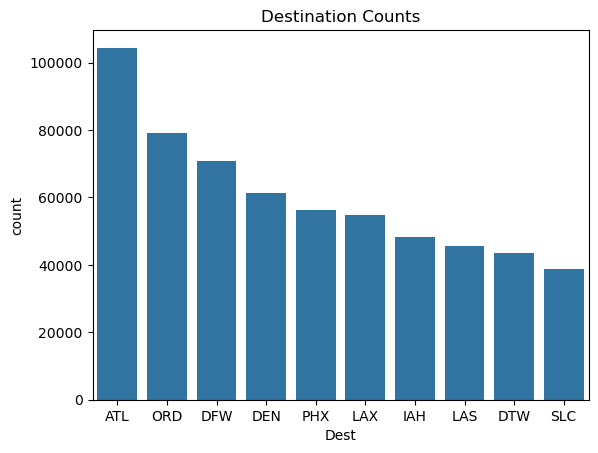

In [6]:
# get the color palette for chart
color = sb.color_palette()[0]

# get list of top 10 Origin
flight_dest = flight.loc[flight['Dest'].isin(['ATL','ORD', 'DFW','DEN', 'PHX', 'LAX', 'IAH', 'LAS', 'DTW', 'SLC'])]
order_val = flight_dest['Dest'].value_counts().index

# plot the top 10 carrier destination
sb.countplot(data = flight_dest, x = 'Dest', order = order_val, color = color)
plt.title('Destination Counts');

From the visualization, it can bee see that Destination ATL has the highest number of carriers in the first 4 months of 2008.

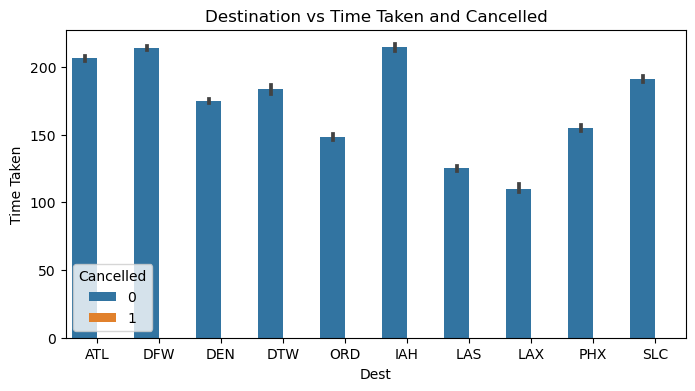

In [7]:
# add figsize to the chart
plt.figure(figsize = [8, 4]);

# set the ordinal data in alphabetical order
dest = ['ATL', 'DFW','DEN', 'DTW', 'ORD', 'IAH', 'LAS', 'LAX', 'PHX', 'SLC']

# plot destination vs time taken and cancelled (was the flight cancelled?)
sb.barplot(x="Dest",y="Time Taken",hue = 'Cancelled',data=flight_dest, order = dest)

# Add chart title
plt.title('Destination vs Time Taken and Cancelled');

From the visualization, it can see that top 10 destination had no cancelled flight or trip.

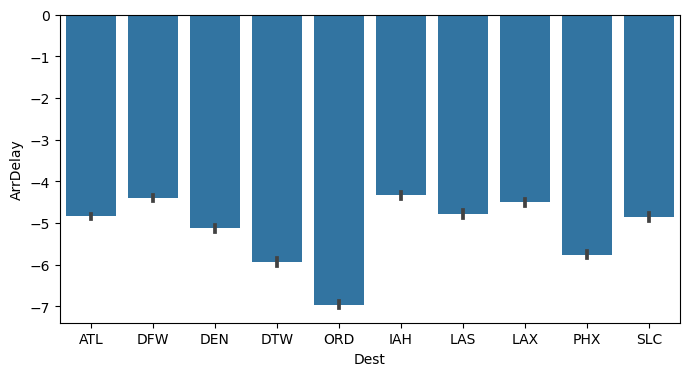

In [8]:
# figsize for the chart
plt.figure(figsize = [8, 4]);

# plot destination vs time taken and cancelled
sb.barplot(x="Dest",y="ArrDelay",data=flight_dest, color = color, order = dest);

This chart above shows that destination ORD experienced the highest delay delays followed by DTW and PHX in the flight for 2008.

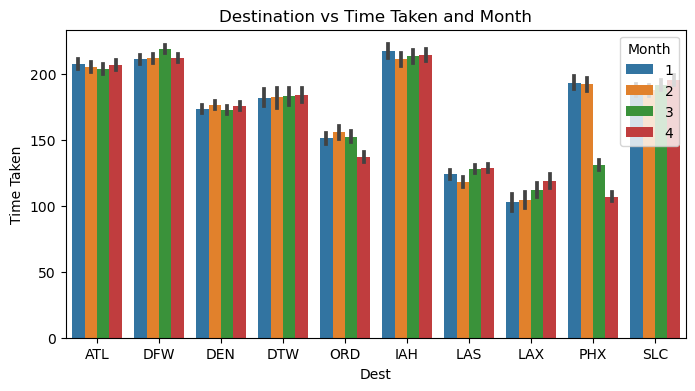

In [9]:
# figsize of the chart
plt.figure(figsize = [8, 4]);

# plot destination vs time taken and Month
sb.barplot(x="Dest",y="Time Taken",data=flight_dest, hue='Month', order = dest)

# positon the legend and add title
plt.legend(loc='upper right', title = 'Month')
plt.title('Destination vs Time Taken and Month');

From the visualization above, it can seen that the flight that took place in Month (4) spent more time for the carrier to reach its destination.

In [10]:
# get the mean value of time taken for each carrier to get to it destination and the cancellation status 
dest = flight_dest.groupby(['Dest', 'Cancelled'])['Time Taken'].mean().reset_index()
dest

,Dest,Cancelled,Time Taken
0,ATL,0,206.278376
1,ATL,1,NaN
2,DEN,0,174.839055
3,DEN,1,NaN
4,DFW,0,213.743297
5,DFW,1,NaN
6,DTW,0,183.248821
7,DTW,1,NaN
8,IAH,0,214.354894
9,IAH,1,NaN


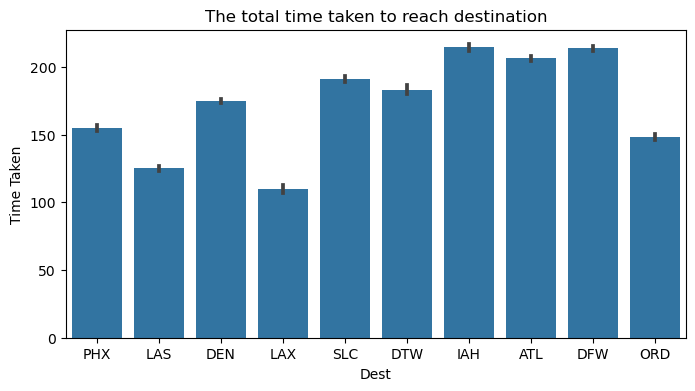

In [11]:
# figsize for the chart
plt.figure(figsize = [8, 4]);

# plot destination vs Time Taken order
# order by destination of flight alphabetically
sb.barplot(x="Dest",y="Time Taken",data= flight_dest, color = color)
plt.title('The total time taken to reach destination');

From the visualization, it can be seen that it took more time for the flight to get to IAX, DFW than in LAX.

In [12]:
# the min and max values for the time taken for each carrier to reach their destination
f_dest = flight_dest.groupby(['Dest'])['Time Taken'].min().reset_index()
f_dest.head()

,Dest,Time Taken
0,ATL,-2312.0
1,DEN,-2277.0
2,DFW,-2303.0
3,DTW,-2220.0
4,IAH,-2227.0


In [13]:
# minimum time (mins) it took for a flight to reach its destination
print(f_dest.min())
# minimum time (mins) it took for a flight to reach its destination
print(f_dest.max())

Dest             ATL
Time Taken   -2323.0
dtype: object
Dest             SLC
Time Taken   -2199.0
dtype: object


## (Visualization 2)

> For Visualization 1, i will be working with the following features **Origin, DepDelay, Time Taken, CancellationCode, Origin, Cancelled and Month**. For the destination code (Origin), it has **278** nunique code. I will be working on top **10** Origin code only. From my visualization below the shows top 10 Origin codes, there no record of cancelled trips. Also, all the top 10 Origin experienced delays with the highest been **LAS** and **PHX**.

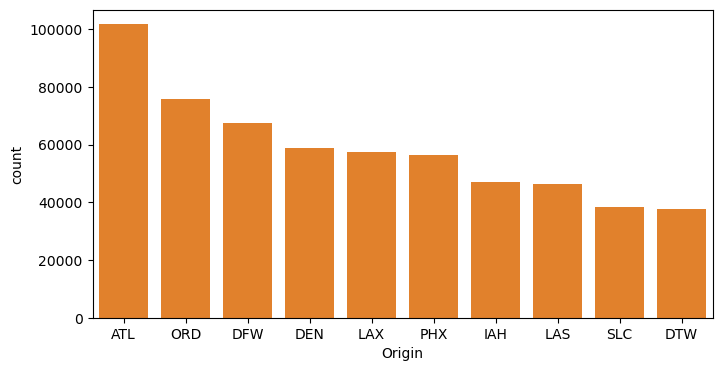

In [14]:
# add figsize to the chart
plt.figure(figsize = [8, 4]);

# get the color palette for chart
color = sb.color_palette()[1]

# get list of top 10 Origin
flight_origin = flight.loc[flight['Origin'].isin(['ATL','ORD', 'DFW','DEN', 'LAX', 'PHX', 'IAH', 'LAS', 'SLC', 'DTW'])]

# get the index value 
order_val = flight_origin['Origin'].value_counts().index

# plot count of Origin
sb.countplot(data = flight_origin, x = 'Origin', order = order_val, color = color);

The chart shows that from the top 10 flight destination in the first four month of 2008, ATL has the highest count.

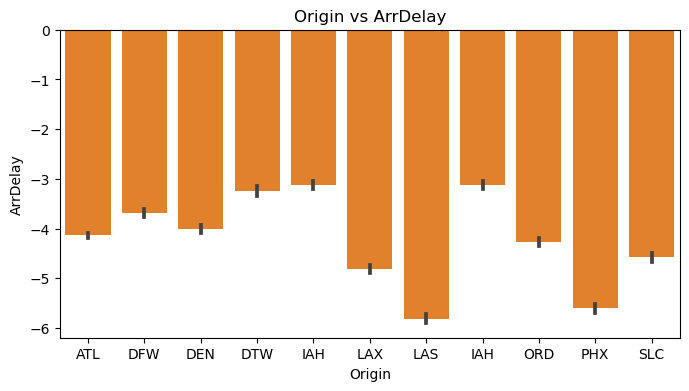

In [15]:
# set the ordinal data in alphabetical order
origin = ['ATL', 'DFW','DEN', 'DTW', 'IAH', 'LAX', 'LAS', 'IAH', 'ORD', 'PHX', 'SLC']

# add figsize in the chart
plt.figure(figsize = [8, 4]);

# plot destination vs time taken and cancelled
sb.barplot(x="Origin",y="ArrDelay",data=flight_origin, color = color, order = origin)

# add title
plt.title('Origin vs ArrDelay');

The chart above shows the Arrival Dealy vs Origin. It depicts LAS, PHX experienced more flight arrival delays.

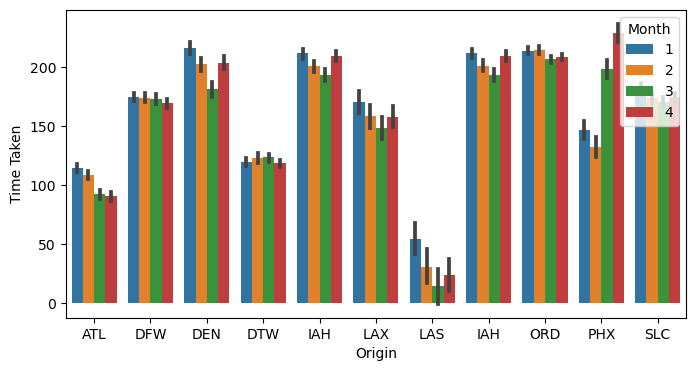

In [16]:
# add figsize in the chart
plt.figure(figsize = [8, 4]);

# plot origin vs timetaken and month
sb.barplot(data = flight_origin, x = 'Origin', y = 'Time Taken', hue = 'Month', order = origin)

# positon the legend and add title
plt.legend(loc='upper right', title = 'Month');

From the visualization above, the chart shows Time Taken vs Origin and Month.

In [17]:
# get the mean value for time taken for each carrier
origin = flight_origin.groupby(['Origin', 'Cancelled'])['Time Taken'].mean().reset_index()
origin

,Origin,Cancelled,Time Taken
0,ATL,0,101.235101
1,ATL,1,NaN
2,DEN,0,200.624383
3,DEN,1,NaN
4,DFW,0,172.809338
5,DFW,1,NaN
6,DTW,0,120.924314
7,DTW,1,NaN
8,IAH,0,204.017569
9,IAH,1,NaN


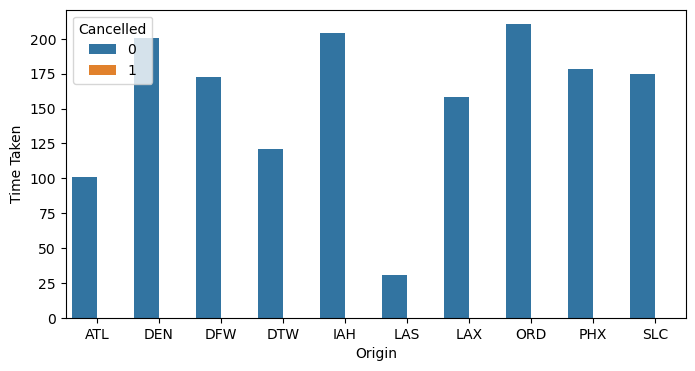

In [18]:
plt.figure(figsize = [8, 4]);

# plot barplot of Origin vs Time Taken and Cancelled
sb.barplot(data=origin, x='Origin',y ='Time Taken', hue='Cancelled');

From the chart above, it can be seen that no flight with carrier from origin was cancelled. 

In [19]:
# i am looking at the best time (Month) for flight to occur
month = flight.groupby(['Month'])['Time Taken'].mean().reset_index()
month

,Month,Time Taken
0,1,166.172065
1,2,163.611885
2,3,161.227787
3,4,161.821381


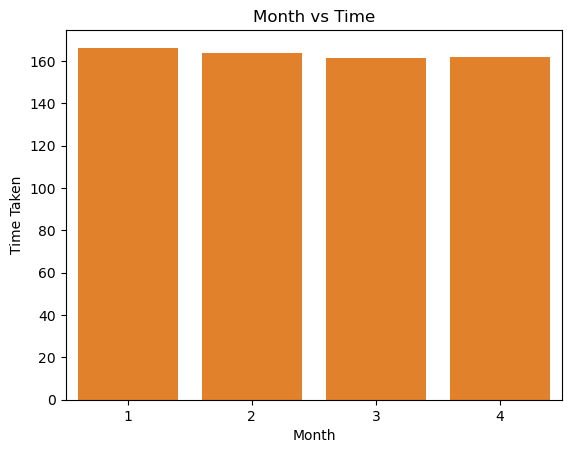

In [20]:
# plot of a numerical and categorical feature
sb.barplot(data= month, x = 'Month', y = 'Time Taken', color = color)
plt.title('Month vs Time');

The visualization above shows that more time was spend in Month 1 (January) in the first 4 months in 2008.

## (Visualization 3)



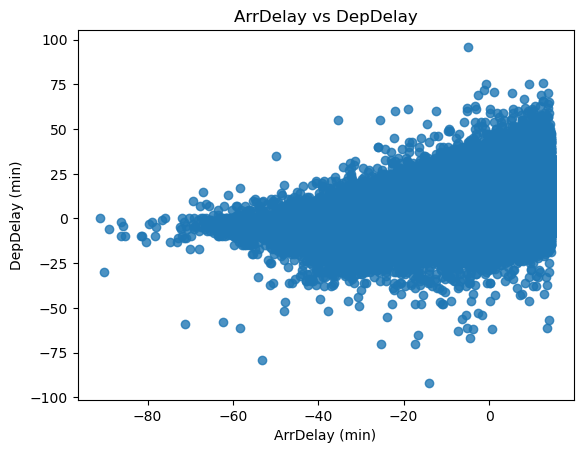

In [21]:
# select random 200 samples
sample = np.random.choice(flight.shape[0], 200, replace = False)

# chose the whole dataframe of the 200 samples selected
fuel_subset = flight.loc[sample]

# we are working with two numerical variables ie displ and comb
sb.regplot(data = flight, x = 'ArrDelay', y='DepDelay', x_jitter = 0.5, fit_reg = False)
plt.xlabel('ArrDelay (min)')
plt.ylabel('DepDelay (min)')
plt.title('ArrDelay vs DepDelay');

The chart shows scatter plot of Arrival delays vs Departure. It can been see that were flight delays.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 